### Задание 1.

Сгенерировать выборку $X_1, ..., X_N$ из равномерного распределения на отрезке $[0; \theta]$ для $N = 10^4.$
Для всех $n \leq N$ посчитать оценки параметра $ \theta $ для $2\overline{X},$ $\overline{X} + \frac{1}{2}X_{(n)},$ $(n+1)X_{(1)},$ $X_{(1)} + X_{(n)},$ $\frac{n+1}{n}X_{(n)}.$ Построить графики для всех оценок функции модуля разности и истинного значения $\theta$ в зависимости от $n.$

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np

In [2]:
N = 10 ** 4
nums = np.arange(1, N + 1)

In [3]:
# функция определения оценок для равномерного распределения
def estimates_calculating(theta):
    
    # генерируем выборку из R[0; theta]
    uniform_sample = np.random.uniform(0, theta, N)
    
    # находим среднее для всех n <= N
    mean = np.divide(np.cumsum(uniform_sample), nums)
    
    # составляем массивы Х_(1) и Х_(n)
    X_1 = np.array([uniform_sample[0:n].min() for n in nums])
    X_n = np.array([uniform_sample[0:n].max() for n in nums])
    
    # считаем оценки параметра theta
    estimates = list()
    estimates.append(mean * 2)                  # 2 * mean(X)
    estimates.append(mean + X_n / 2)            # mean(X) + X_(n) / 2
    estimates.append((nums + 1) * X_1)          # (n+1) * X_(1)
    estimates.append(X_1 + X_n)                 # X_(1) + X_(n)
    estimates.append(X_n * (nums + 1) / nums)   # (n+1) / n * X_(n)
    return estimates

In [4]:
# функция построения графиков модуля разности истинного и найденного значений theta
def plot_creation(estimates, theta, flag_for_show_bad_estimates):

    plt.figure(figsize=(20,10))
    plt.grid()
    plt.xlabel("sample size", fontsize=15)
    plt.ylabel("difference between real and calculated estimates", fontsize=15)
    
    plt.plot(nums, abs(estimates[0] - theta), label='2 * mean(X)')
    plt.plot(nums, abs(estimates[1] - theta), label='mean(X) + X_(n) / 2')
    if flag_for_show_bad_estimates:
        plt.plot(nums, abs(estimates[2] - theta), label='(n+1) * X_(1)')
    plt.plot(nums, abs(estimates[3] - theta), label='X_(1) + X_(n)')
    plt.plot(nums, abs(estimates[4] - theta), label='(n+1) / n * X_(n)')
    
    if not flag_for_show_bad_estimates:
        plt.ylim(0, 1)
    plt.legend()
    plt.show()

In [5]:
def generate_and_plotting(theta, flag = False):
    res = estimates_calculating(theta)
    plot_creation(res, theta, flag)

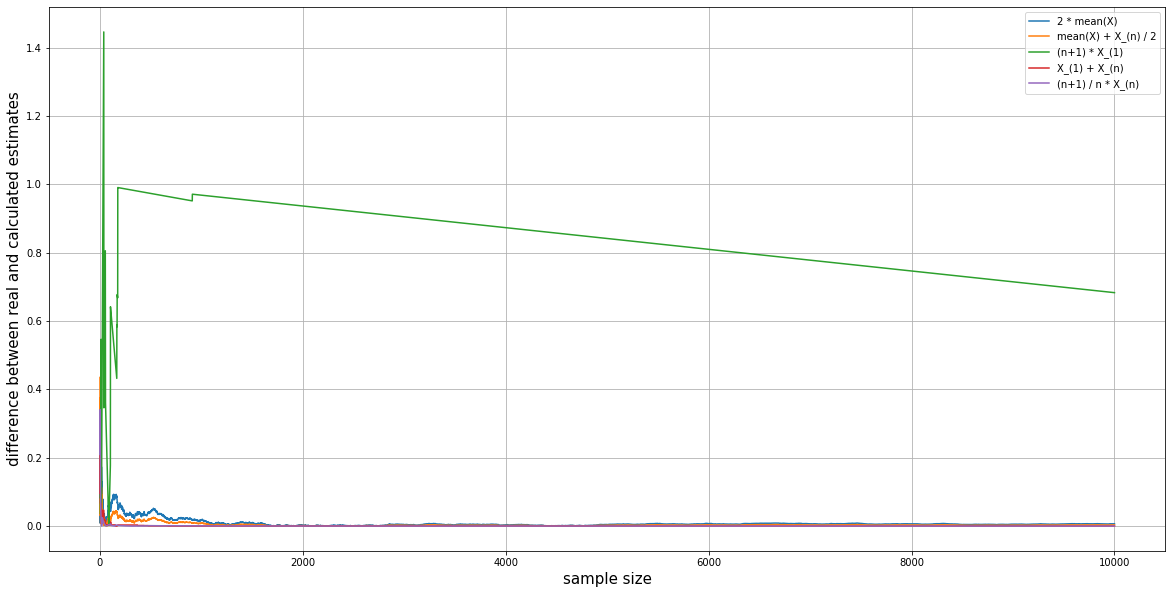

In [6]:
# theta = 1
generate_and_plotting(1, True)

Как видно оценка $\theta = (n+1) X_{(1)}$ не сходится, т.к. она не является состоятельной. Далее мы не будем показывать её на графике.

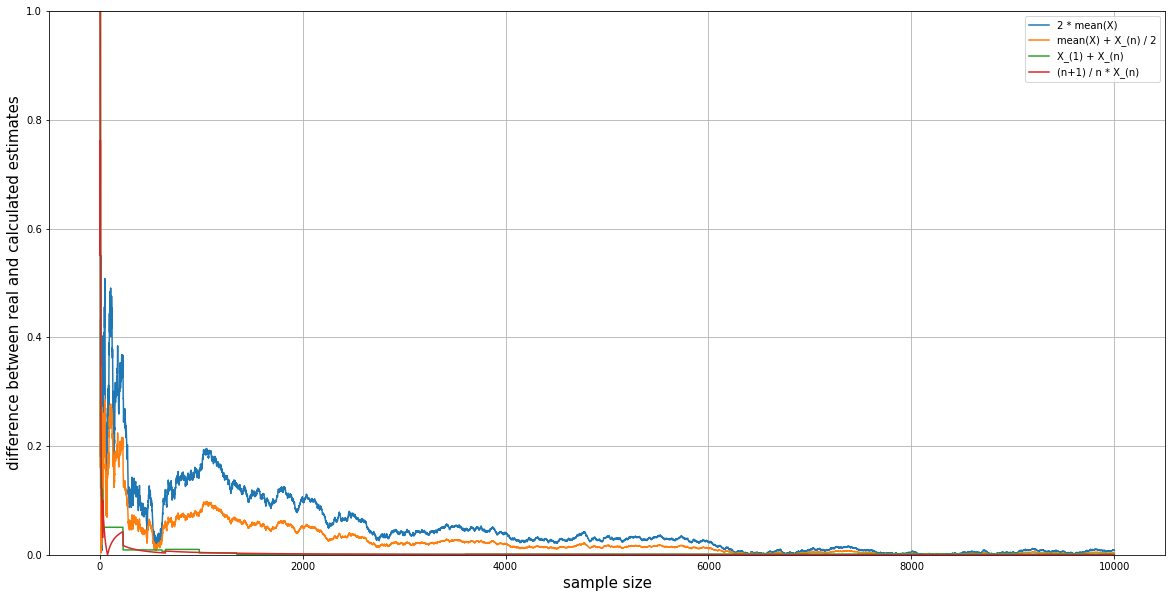

In [7]:
#theta = 5
generate_and_plotting(5)

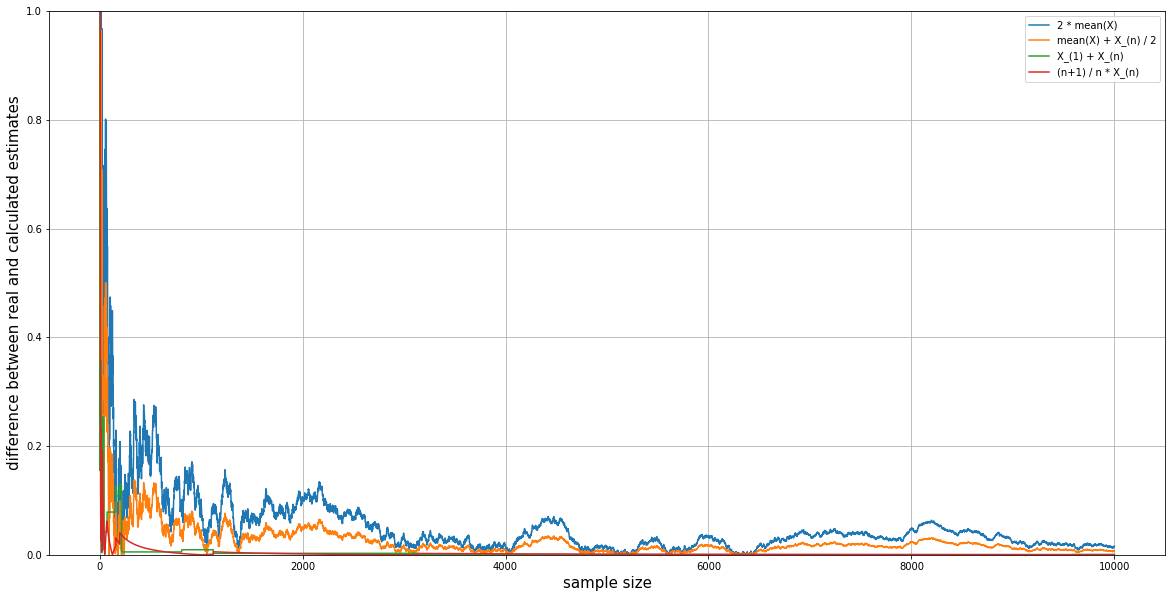

In [8]:
#theta = 10
generate_and_plotting(10)

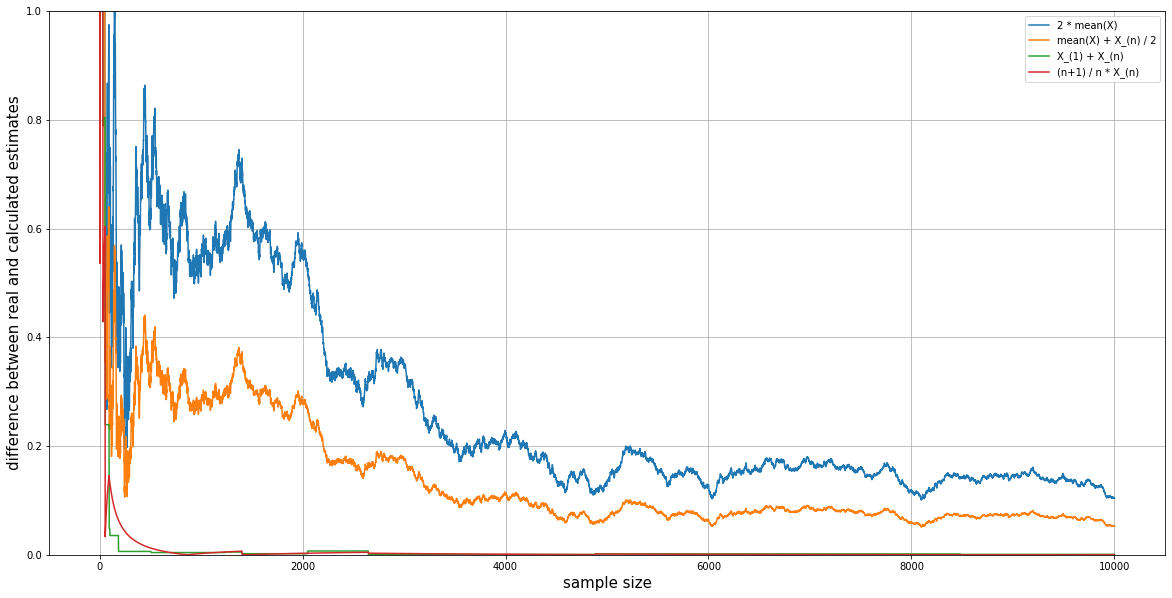

In [9]:
#theta = 15
generate_and_plotting(15)

Вывод: на больших значениях $\theta$ оценки $2\overline{X}$ и $\overline{X} + \frac{1}{2}X_{(n)}$ сходятся хуже, чем оценки $X_{(1)} + X_{(n)}$ и $\frac{n+1}{n}X_{(n)}.$ Также при увеличении размера выборки растёт точность нашей оценки $\theta.$

### Задание 2.

Сгенерировать выборку $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4.$ Для всех $n \leq N$ посчитать оценку $(k!/\overline{X^k})^{1/k}$ параметра $\theta.$ Провести исследование, аналогичное предыдущей задаче, и выяснить при каком $k$ оценка ведёт себя лучше.

In [10]:
import math

theta = 1
N = 10 ** 4
nums = np.arange(1, N + 1)

In [11]:
def generate_estimates(k):
    # генерируем выборку из экспоненциального распределение с параметром theta = 1
    exp_sample = np.random.exponential(theta, N)
    return (math.factorial(k) / np.divide((exp_sample ** k).cumsum(), nums)) ** (1. / k)

In [12]:
def plot_creation(k):
    
    plt.figure(figsize=(20,10))
    plt.grid()
    plt.xlabel("sample size", fontsize=15)
    plt.ylabel("difference between real and calculated estimates", fontsize=15)
    estimation = abs(generate_estimates(k) - theta)
    plt.plot(nums, estimation, label=f'({k}! / mean(X^{k}))^(1/{k})')
    plt.ylim(0,5)
    plt.legend()
    plt.show()

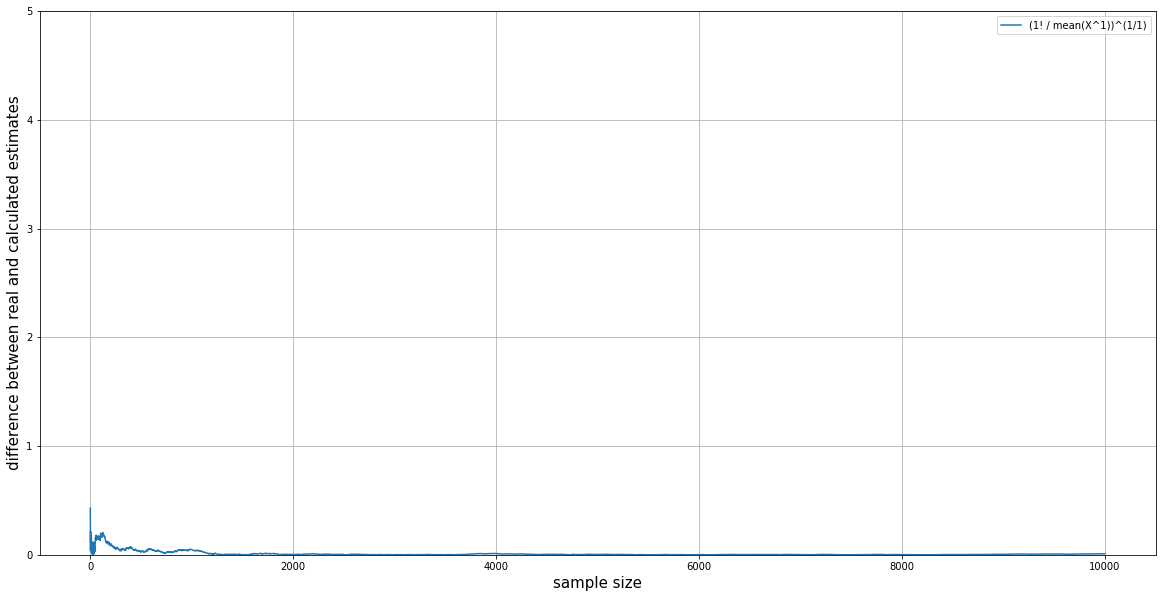

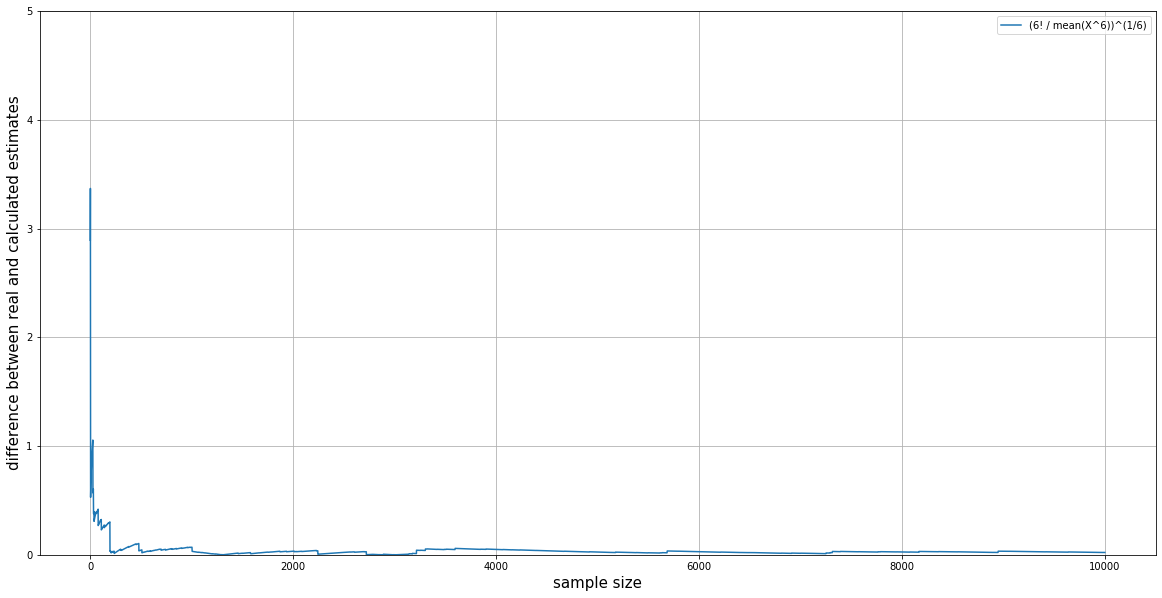

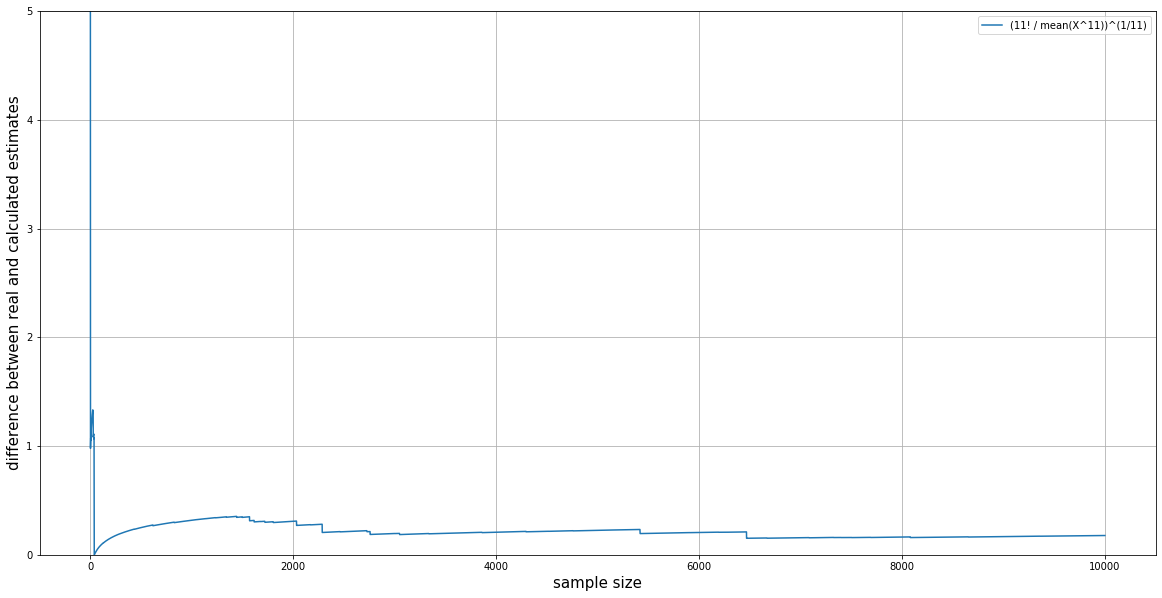

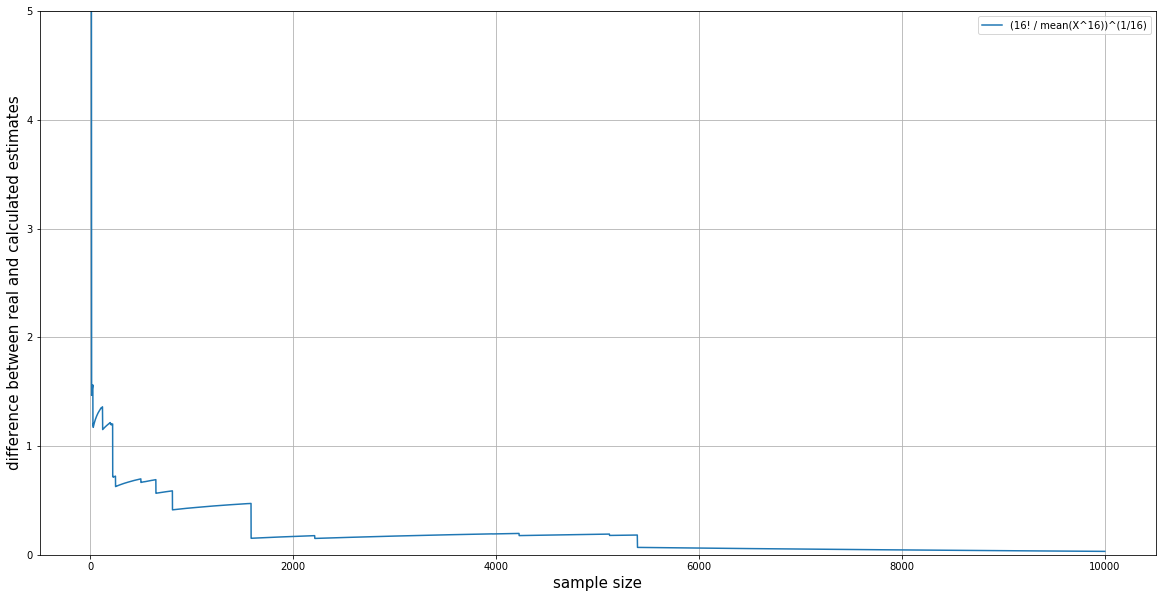

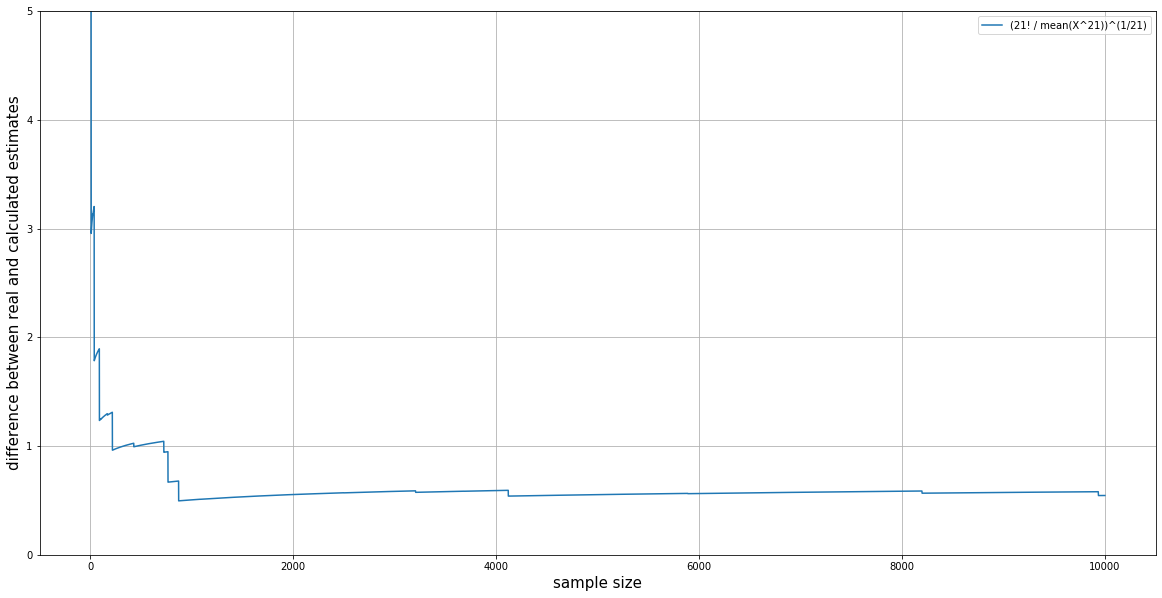

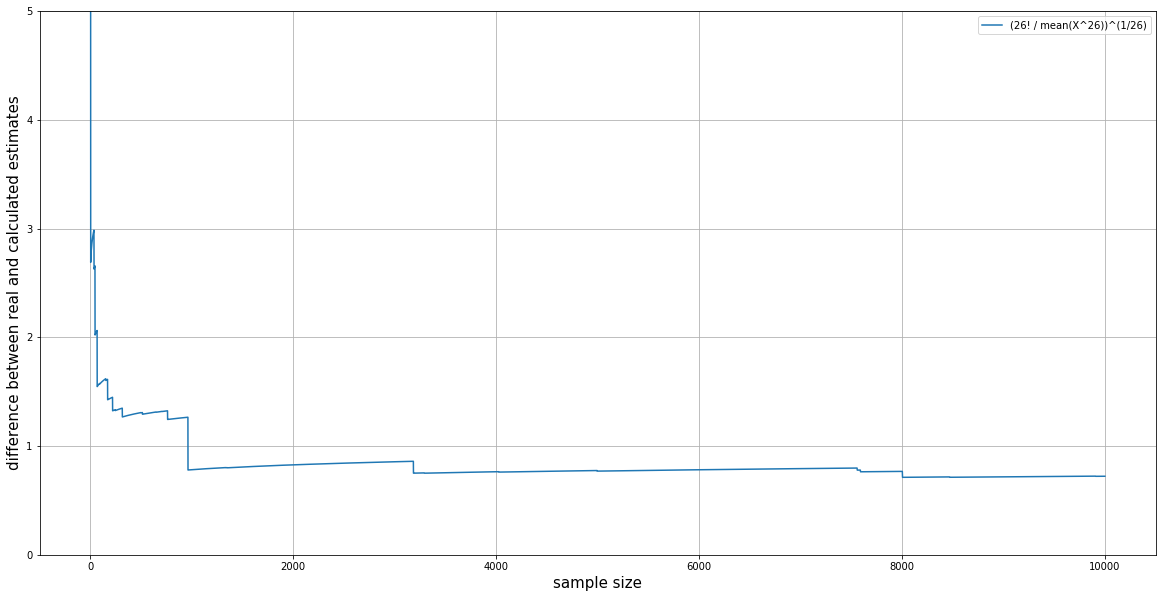

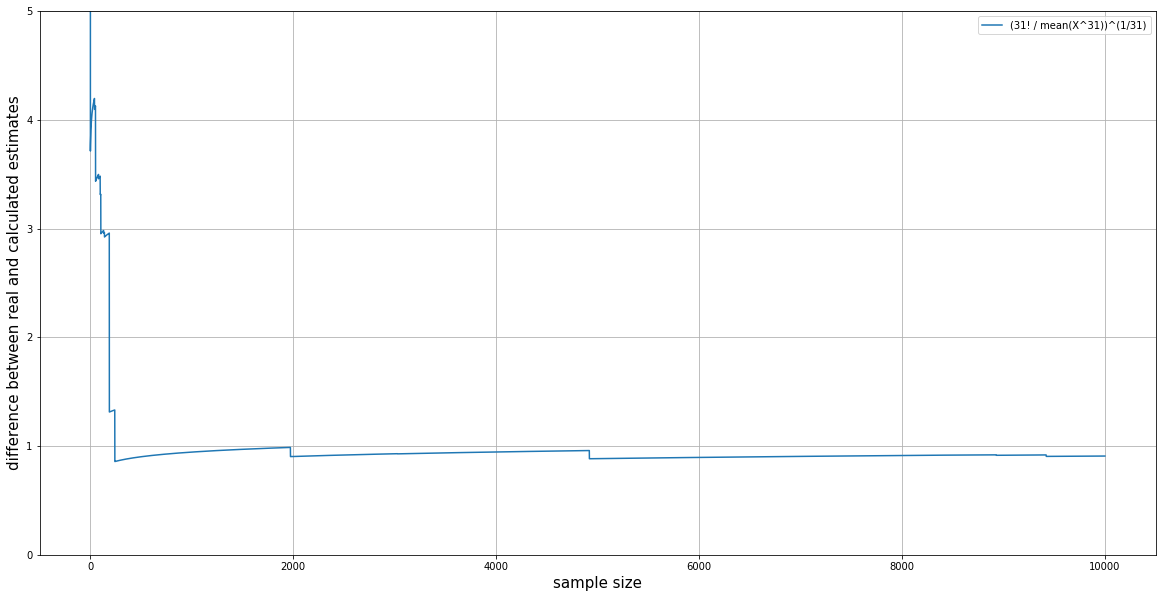

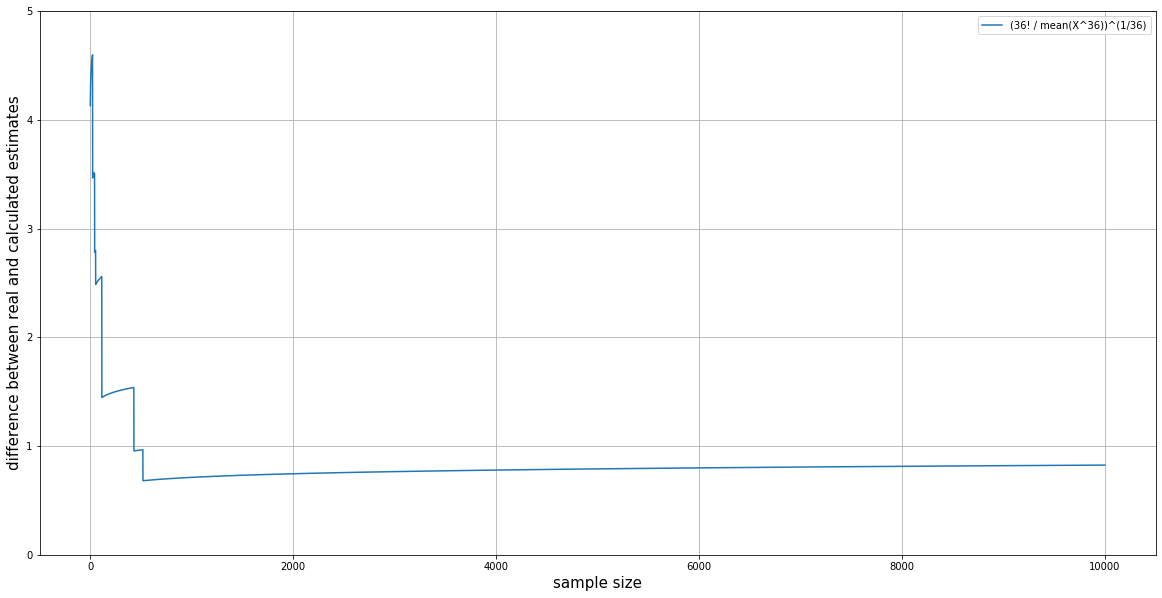

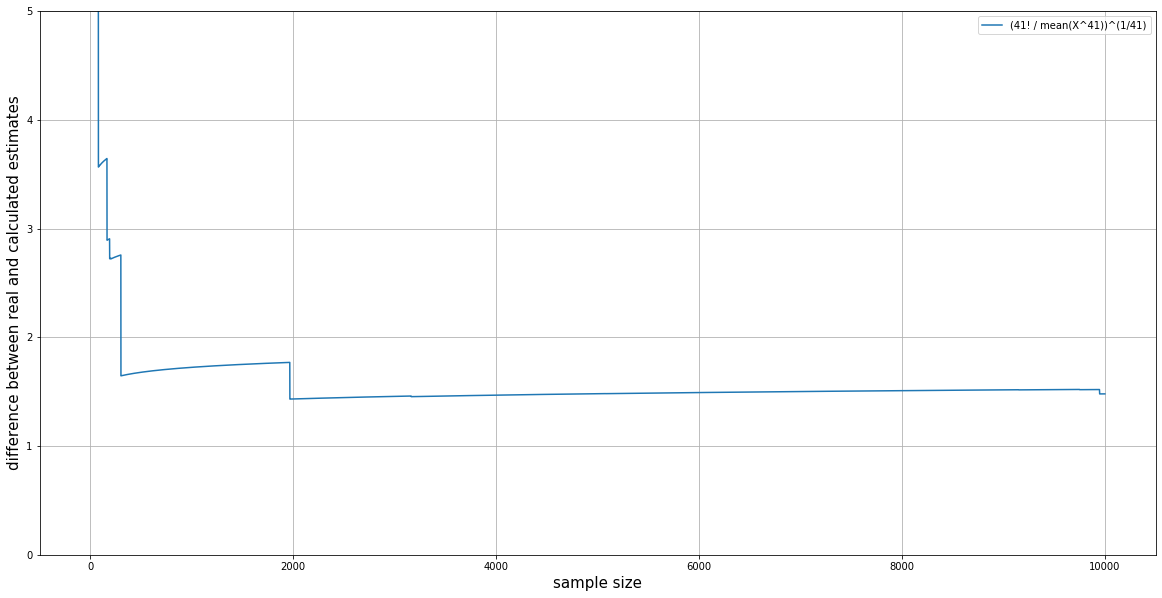

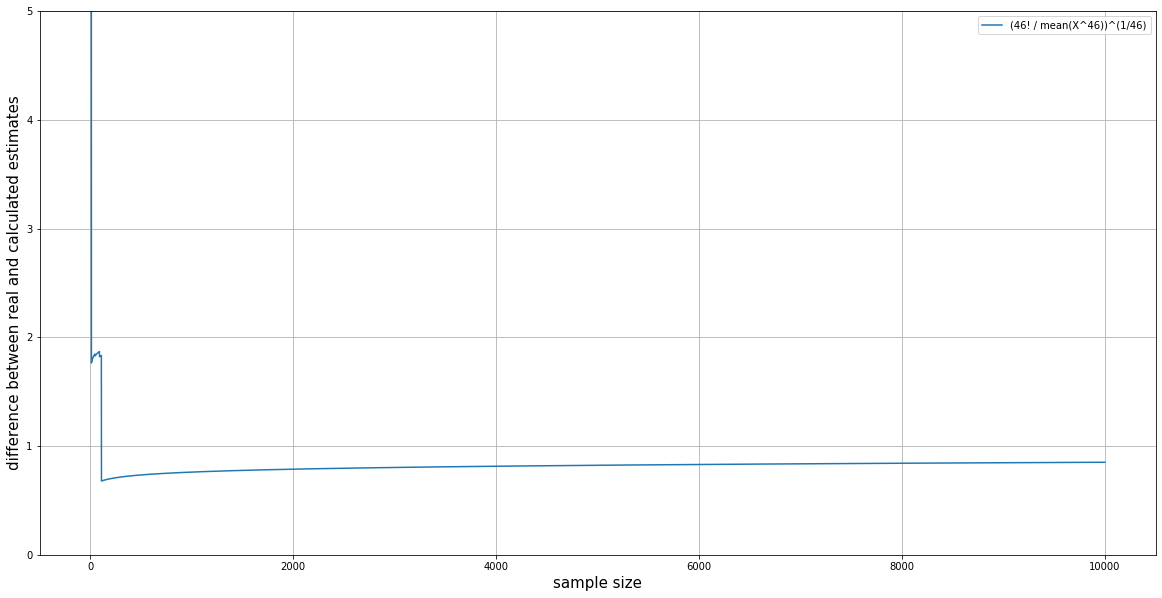

In [13]:
for k in range(1, 50, 5):
    plot_creation(k)

Вывод: чем ближе значение $k$ к $1$, тем лучше оценка.

### Задача 3.

Сгенерировать выборку $X_1, ..., X_N$ для $N = 10^4$ из распределения, т.ч. первые четыре момента его конечны, а пятый -- нет. Построить график плотности. Для всех $n \leq N$ посчитать оценку $s^2 = \overline{X^2} - \overline{X}^2$ для дисперсии. Построить график модуля разности оценки дисперсии и её истинного значения в зависимости от $n.$ Провести аналогичное исследование для выборки из распределения Коши.

Рассмотрим распределение Парето $P(k, x_m)$ с функцией распределения $ F_X(x) = 1 - \left( \frac{x_m}{x} \right)^k$ и плотностью вероятности $p_X(x) = \frac{kx^k_m}{x^{k+1}}.$

Моменты и дисперсия случайной величины с распределением Парето задаются формулами $E[X^n] = \frac{kx^n_m}{k-n},$ $D[X] = \left( \frac{x_m}{k-1} \right)^2 \frac{k}{k-2}.$

Тогда заметим, что для $P(5, x_m)$ первые четыре момента конечны, а пятый -- нет.

In [14]:
N = 10 ** 4
k = 5
# будем рассматривать распределение с x_m = 1

In [15]:
# плотность распределения в точке x
def distribution_density(x, k):
    return k / x ** (k + 1)

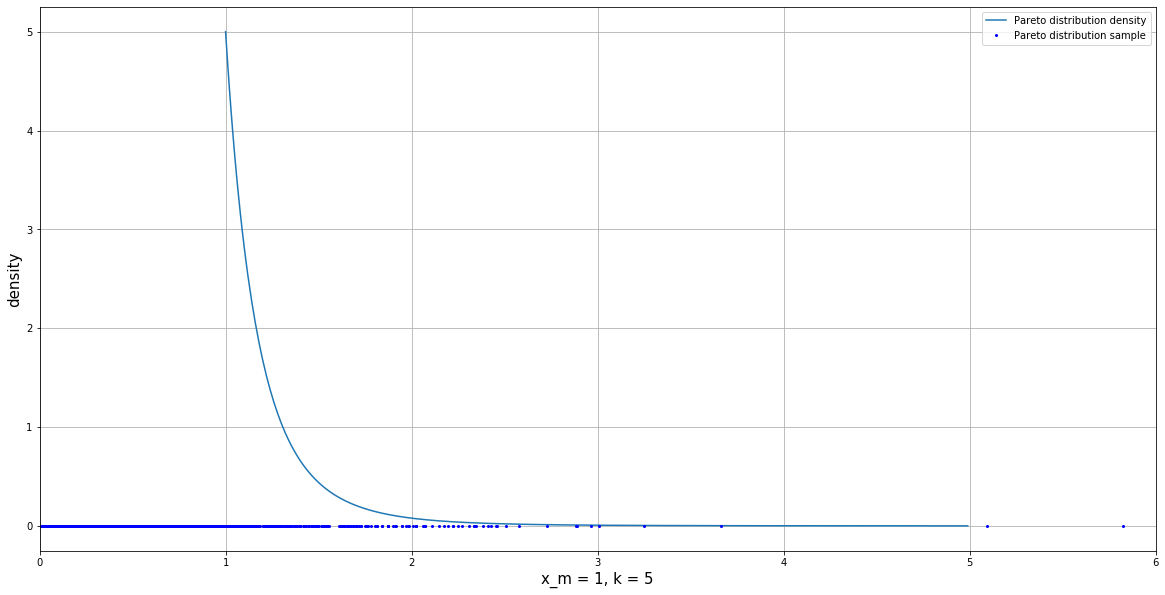

In [16]:
# генерируем выборку из распределения Парето P(5,1)
pareto_sample = np.random.pareto(k, N)

plt.figure(figsize=(20,10))
plt.grid()
plt.xlabel('x_m = 1, k = 5', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.plot(np.arange(1, 5, 0.01), [distribution_density(x, k) for x in np.arange(1, 5, 0.01)], label='Pareto distribution density')
plt.plot(pareto_sample, [0] * N, 'bo', ms=2, label='Pareto distribution sample')
plt.xlim(0, 6)
plt.legend()
plt.show()

In [17]:
# считаем оценку s^2 = s^2(X_1, ..., X_n)
nums = np.arange(1, N + 1)
estimation = np.divide((pareto_sample ** 2).cumsum(), nums) - (np.divide(pareto_sample.cumsum(), nums)) ** 2

# и дисперсию распределения Парето
disp = (k - 1) ** (-2) * k / (k - 2)

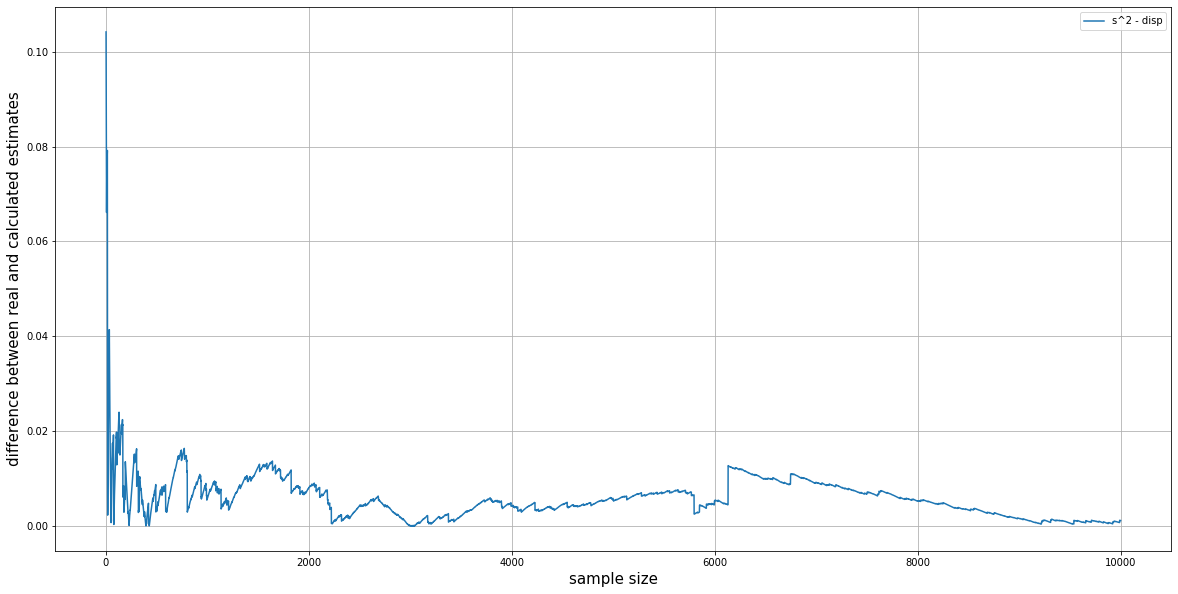

In [18]:
# строим график модуля разности истинного и найденного значений оценки дисперсии

plt.figure(figsize=(20,10))
plt.grid()
plt.xlabel("sample size", fontsize=15)
plt.ylabel("difference between real and calculated estimates", fontsize=15)
    
plt.plot(nums, abs(estimation - disp), label='s^2 - disp')
plt.legend()
plt.show()

In [19]:
# генерируем выборку из распределения Коши
cauchy_sample = np.random.standard_cauchy(N)

# считаем оценку s^2 = s^2(X_1, ..., X_n)
cauchy_evolution = np.divide((cauchy_sample ** 2).cumsum(), nums) - (np.divide(cauchy_sample.cumsum(), nums)) ** 2

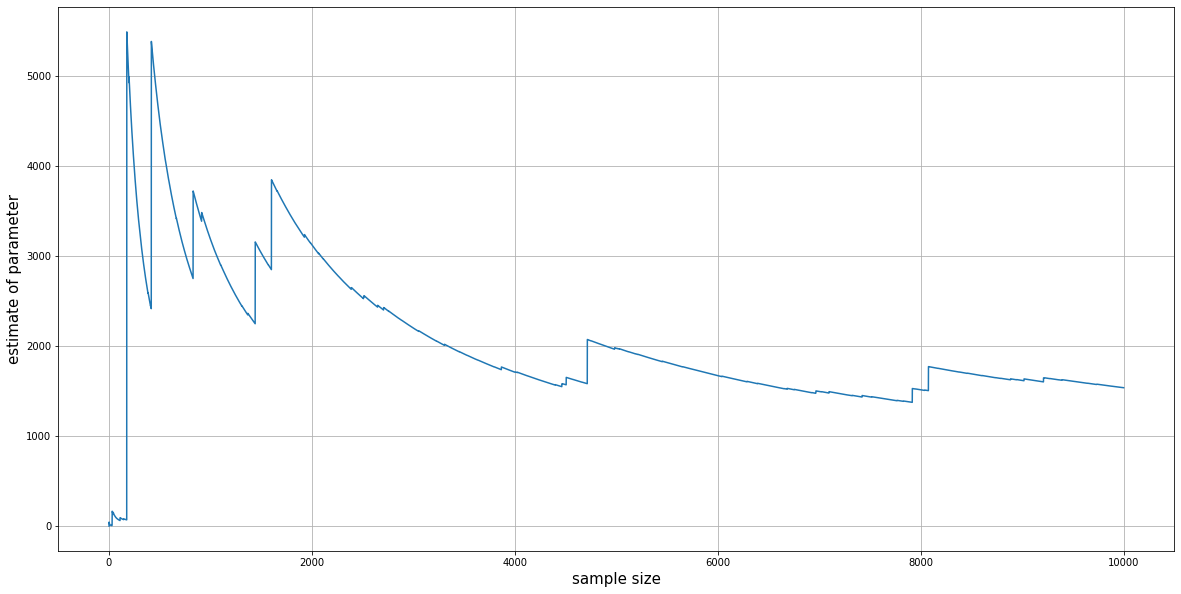

In [20]:
# строим график оценки дисперсии

plt.figure(figsize=(20, 10))
plt.grid()
plt.xlabel('sample size', fontsize=15)
plt.ylabel('estimate of parameter', fontsize=15)
plt.plot(nums, cauchy_evolution)
plt.show()

Вывод: при увеличении размера выборки растёт точность оценки дисперсии.